Group members: John Kushan, Alyssa Whalen, Frank Hegedus, Brendan Kirsh

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii 
import astropy.constants as ac
import astropy.units as u

In [2]:
tab = astropy.io.ascii.read("PS_2023.01.18_12.07.56.csv")

In [3]:
print(tab.colnames)

['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'soltype', 'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_metratio', 'st_logg', 'st

In [4]:
planets = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"]
periods = [88, 255, 365, 687, 4333, 10759, 30687, 60190]
masses = [0.0553, 0.815, 1, 0.107, 317.8, 95.2, 14.5, 17.1]
radii = [0.383, 0.949, 1, 0.532, 11.21, 9.45, 4.01, 3.88]
semimajors = [0.387, 0.723, 1, 1.52, 5.20, 9.57, 19.17, 30.18]

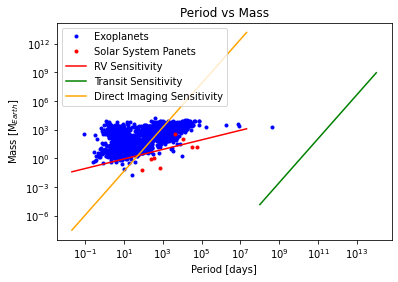

In [5]:
plt.plot(tab["pl_orbper"], tab["pl_bmasse"], "b.",label = "Exoplanets")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Mass [M$_{Earth}$]")
#Solar System Planets
plt.plot(periods, masses, "r.",  label = "Solar System Panets")
plt.title('Period vs Mass')
# Radial Velocity
sma_arr = 10.0**(np.arange(10)-4) * u.AU
m_p_arr = 0.5 * u.meter / u.second * 0.5 * u.solMass * np.sqrt(sma_arr / ac.G / (0.5 * u.solMass))
plt.plot((((2)*(np.pi)*((sma_arr.value)**(3)/(ac.G)/(0.5 * u.solMass))**(0.5))/365)**(2/3), (m_p_arr.decompose().to(u.earthMass)), color="red", label = "RV Sensitivity")
# Transit
p_arr = 10**(np.arange(8,15))* u.day
rad_trans = ((((46e-6)*(p_arr)**(1/2))/((4*365* u.day)**(1/2)))**2)*(0.5*u.solRad)
plt.plot(p_arr.value, (rad_trans.decompose().to(u.earthRad))**(1/.435), color="green", label = "Transit Sensitivity")
# Direct Imaging
rad_di = ((4*(4e-9)*(sma_arr)**2)/(0.3))**(1/2)
plt.plot((((2)*(np.pi)*((sma_arr.value)**(3)/(ac.G)/(0.5 * u.solMass))**(0.5))/365)**(2/3), ((rad_di).decompose().to(u.earthRad))**(1/0.435), color="orange", label = "Direct Imaging Sensitivity")
plt.legend()


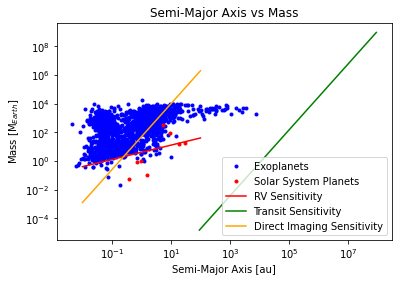

In [6]:
plt.plot(tab["pl_orbsmax"], tab["pl_bmasse"], "b.", label = "Exoplanets")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-Major Axis [au]")
plt.ylabel(r"Mass [M$_{Earth}$]")
#Solar System Planets
plt.plot(semimajors, masses, "r.", label = "Solar System Planets")
plt.title('Semi-Major Axis vs Mass')
# Radial Velocity
sma_arr = 10.0**(np.arange(5)-2) * u.AU
m_p_arr = 0.5 * u.meter / u.second * 0.5 * u.solMass * np.sqrt(sma_arr / ac.G / (0.5 * u.solMass))
plt.plot(sma_arr.value, m_p_arr.decompose().to(u.earthMass), color="red", label = "RV Sensitivity")
# Transit
p_arr = 10**(np.arange(8,15))* u.day
rad_trans = ((((46e-6)*(p_arr)**(1/2))/((4*365* u.day)**(1/2)))**2)*(0.5*u.solRad)
plt.plot(((((p_arr.value/2/np.pi)**2)*ac.G*(0.5*u.solMass))**(1/3))**(3/2), (rad_trans.decompose().to(u.earthRad))**(1/.435), color="green", label = "Transit Sensitivity")
# Direct Imaging
rad_di = ((4*(4e-9)*(sma_arr)**2)/(0.3))**(1/2)
plt.plot(sma_arr.value, (rad_di.decompose().to(u.earthRad))**(1/0.435), color="orange", label = "Direct Imaging Sensitivity")
plt.legend()


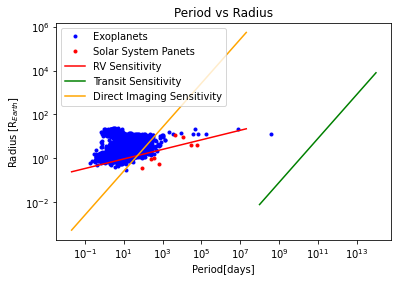

In [9]:

plt.plot(tab["pl_orbper"], tab["pl_rade"], "b.",label = "Exoplanets")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period[days]")
plt.ylabel(r"Radius [R$_{Earth}$]")
#Solar System Planets
plt.plot(periods,radii,"r.",  label = "Solar System Panets")
plt.title('Period vs Radius')
#radial velocity
sma_arr = 10.0**(np.arange(10)-4) * u.AU
m_p_arr = 0.5 * u.meter / u.second * 0.5 * u.solMass * np.sqrt(sma_arr / ac.G / (0.5 * u.solMass))
plt.plot((((2)*(np.pi)*((sma_arr.value)**(3)/(ac.G)/(0.5 * u.solMass))**(0.5))/365)**(2/3), (m_p_arr.decompose().to(u.earthMass))**(.435), color="red", label = "RV Sensitivity")
# Transit
p_arr = 10**(np.arange(8,15))* u.day
rad_trans = ((((46e-6)*(p_arr)**(1/2))/((4*365* u.day)**(1/2)))**2)*(0.5*u.solRad)
plt.plot(p_arr.value, rad_trans.decompose().to(u.earthRad), color="green", label = "Transit Sensitivity")
# Direct Imaging
rad_di = ((4*(4e-9)*(sma_arr)**2)/(0.3))**(1/2)
plt.plot((((2)*(np.pi)*((sma_arr.value)**(3)/(ac.G)/(0.5 * u.solMass))**(0.5))/365)**(2/3), rad_di.decompose().to(u.earthRad), color="orange", label = "Direct Imaging Sensitivity")
plt.legend()


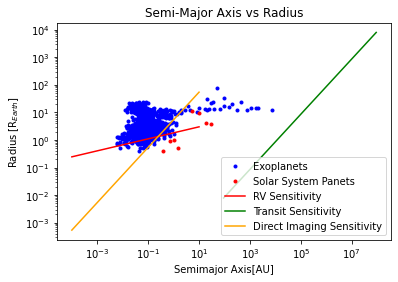

In [8]:
plt.plot(tab["pl_orbsmax"], tab["pl_rade"], "b.", label = "Exoplanets")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semimajor Axis[AU]")
plt.ylabel(r"Radius [R$_{Earth}$]")
#Solar System Planets
plt.plot(semimajors,radii, "r.", label = "Solar System Panets")
plt.title('Semi-Major Axis vs Radius')
# Radial Velocity
sma_arr = 10.0**(np.arange(6)-4) * u.AU
m_p_arr = 0.5 * u.meter / u.second * 0.5 * u.solMass * np.sqrt(sma_arr / ac.G / (0.5 * u.solMass))
plt.plot((sma_arr.value), (m_p_arr.decompose().to(u.earthMass))**(.435), color="red", label = "RV Sensitivity")
# Transit
p_arr = 10**(np.arange(8,15))* u.day
rad_trans = ((((46e-6)*(p_arr)**(1/2))/((4*365* u.day)**(1/2)))**2)*(0.5*u.solRad)
plt.plot(((((p_arr.value/2/np.pi)**2)*ac.G*(0.5 *u.solMass))**(1/3))**(3/2), rad_trans.decompose().to(u.earthRad), color="green", label = "Transit Sensitivity")
# Direct Imaging
rad_di = ((4*(4e-9)*(sma_arr)**2)/(0.3))**(1/2)
plt.plot(sma_arr.value, rad_di.decompose().to(u.earthRad), color="orange", label = "Direct Imaging Sensitivity")
plt.legend()
